<a href="https://colab.research.google.com/github/srt3000/CE888/blob/main/Lab_4/my_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
np.set_printoptions(precision = 3)
# np.set_printoptions(precision=3)



In [10]:
#the value "99" corresponds to "null" = "not rated"
#Ratings are real values ranging from -10.00 to +10.00
#The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.
column_names = list(range(0,101))
print(column_names)
data = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv',names=column_names)
df= data.copy()
df



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,99.00,99.00,99.00,99.00,99.00,99.00,99.00,-9.42,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.30,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,...,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.00,99.00,99.00,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,7.18,...,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.00,99.00,99.00,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,100,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,-0.53,5.63,-7.14,-4.08,-3.50,-8.20,-3.98,-9.22,-0.15,-6.46,5.63,-0.92,-2.91,-4.17,2.82,3.40,8.64,6.84,6.80,-0.87,7.38,-3.50,8.88,7.43,5.39,2.23,-0.68,3.40,-0.58,...,8.59,3.45,0.87,9.27,-4.66,5.73,-0.49,8.35,1.94,5.00,-9.66,8.98,8.98,-9.81,9.13,9.08,9.08,3.98,0.73,9.03,8.98,9.22,8.93,9.13,9.27,-1.99,-9.95,-9.90,9.13,8.83,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,91,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,8.88,-8.69,-7.48,-8.83,-1.75,6.60,3.54,1.50,7.67,-0.44,9.22,8.74,9.03,9.08,8.93,3.74,3.20,-9.17,-8.98,8.79,-7.67,-3.06,9.13,8.40,-0.63,-7.18,0.58,8.88,9.27,...,2.77,8.11,-7.96,8.93,-0.87,-5.87,8.88,-1.12,-8.74,8.74,99.00,99.00,99.00,99.00,99.00,4.90,99.00,99.00,99.00,99.00,-0.29,0.92,-0.78,0.15,-0.10,0.00,-0.19,-0.87,-1.36,-0.58,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,39,99.00,99.00,99.00,99.00,-7.77,99.00,6.70,-6.75,99.00,99.00,99.00,99.00,-6.46,-1.65,-6.80,-6.41,-6.99,7.23,6.75,-6.99,6.55,99.00,99.00,99.00,99.00,0.49,-0.53,-6.94,-0.49,99.00,6.46,-0.53,99.00,99.00,-7.86,-0.34,99.00,-6.94,99.00,...,0.49,-0.24,99.00,99.00,-3.11,-6.65,99.00,-0.58,6.31,99.00,99.00,-7.86,99.00,99.00,

In [11]:
df.replace(99,  np.nan, inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,74.0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.42,NaN,NaN,NaN,-7.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,100.0,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.30,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49.0,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,NaN,8.25,NaN,NaN,7.48,7.28,7.28,8.93,NaN,6.17,7.28,NaN,NaN,8.98,7.33,NaN,6.17,9.08,...,6.46,7.28,NaN,NaN,7.04,7.28,NaN,7.28,8.25,NaN,NaN,NaN,NaN,NaN,NaN,8.93,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.03,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,48.0,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,NaN,NaN,NaN,NaN,2.91,3.93,6.75,6.60,NaN,6.65,-6.12,NaN,7.57,6.21,6.65,NaN,-8.30,7.18,...,0.00,-3.69,NaN,NaN,7.82,0.24,NaN,7.28,-2.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,-2.33,NaN,NaN,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,91.0,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,NaN,NaN,NaN,NaN,NaN,NaN,4.13,NaN,NaN,NaN,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,100.0,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,-0.53,5.63,-7.14,-4.08,-3.50,-8.20,-3.98,-9.22,-0.15,-6.46,5.63,-0.92,-2.91,-4.17,2.82,3.40,8.64,6.84,6.80,-0.87,7.38,-3.50,8.88,7.43,5.39,2.23,-0.68,3.40,-0.58,...,8.59,3.45,0.87,9.27,-4.66,5.73,-0.49,8.35,1.94,5.00,-9.66,8.98,8.98,-9.81,9.13,9.08,9.08,3.98,0.73,9.03,8.98,9.22,8.93,9.13,9.27,-1.99,-9.95,-9.90,9.13,8.83,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,91.0,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,8.88,-8.69,-7.48,-8.83,-1.75,6.60,3.54,1.50,7.67,-0.44,9.22,8.74,9.03,9.08,8.93,3.74,3.20,-9.17,-8.98,8.79,-7.67,-3.06,9.13,8.40,-0.63,-7.18,0.58,8.88,9.27,...,2.77,8.11,-7.96,8.93,-0.87,-5.87,8.88,-1.12,-8.74,8.74,NaN,NaN,NaN,NaN,NaN,4.90,NaN,NaN,NaN,NaN,-0.29,0.92,-0.78,0.15,-0.10,0.00,-0.19,-0.87,-1.36,-0.58,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,39.0,NaN,NaN,NaN,NaN,-7.77,NaN,6.70,-6.75,NaN,NaN,NaN,NaN,-6.46,-1.65,-6.80,-6.41,-6.99,7.23,6.75,-6.99,6.55,NaN,NaN,NaN,NaN,0.49,-0.53,-6.94,-0.49,NaN,6.46,-0.53,NaN,NaN,-7.86,-0.34,NaN,-6.94,NaN,...,0.49,-0.24,NaN,NaN,-3.11,-6.65,NaN,-0.58,6.31,NaN,NaN,-7.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24981,37.0,NaN,NaN,NaN,NaN,-9.71,NaN,4.56,-8.30,NaN,NaN,NaN,NaN,-9.47,NaN,3.45,-0.92,-4.51,-4.13,-5.73,-9.51,2.82,NaN,NaN,NaN,NaN,-0.49,2.91,2.62,8.30,NaN,3.06,5.44,NaN,NaN,-0.68,2.04,NaN,

In [12]:
#Drop the 1st column as it doesn't contain ratings, its the number of ratings that a user did
df.drop(0, axis=1, inplace=True)
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.42,NaN,NaN,NaN,-7.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.30,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,NaN,8.25,NaN,NaN,7.48,7.28,7.28,8.93,NaN,6.17,7.28,NaN,NaN,8.98,7.33,NaN,6.17,9.08,7.33,...,6.46,7.28,NaN,NaN,7.04,7.28,NaN,7.28,8.25,NaN,NaN,NaN,NaN,NaN,NaN,8.93,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.03,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,NaN,NaN,NaN,NaN,2.91,3.93,6.75,6.60,NaN,6.65,-6.12,NaN,7.57,6.21,6.65,NaN,-8.30,7.18,2.82,...,0.00,-3.69,NaN,NaN,7.82,0.24,NaN,7.28,-2.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,-2.33,NaN,NaN,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,NaN,NaN,NaN,NaN,NaN,NaN,4.13,NaN,NaN,NaN,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,-0.53,5.63,-7.14,-4.08,-3.50,-8.20,-3.98,-9.22,-0.15,-6.46,5.63,-0.92,-2.91,-4.17,2.82,3.40,8.64,6.84,6.80,-0.87,7.38,-3.50,8.88,7.43,5.39,2.23,-0.68,3.40,-0.58,4.42,...,8.59,3.45,0.87,9.27,-4.66,5.73,-0.49,8.35,1.94,5.00,-9.66,8.98,8.98,-9.81,9.13,9.08,9.08,3.98,0.73,9.03,8.98,9.22,8.93,9.13,9.27,-1.99,-9.95,-9.90,9.13,8.83,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,8.88,-8.69,-7.48,-8.83,-1.75,6.60,3.54,1.50,7.67,-0.44,9.22,8.74,9.03,9.08,8.93,3.74,3.20,-9.17,-8.98,8.79,-7.67,-3.06,9.13,8.40,-0.63,-7.18,0.58,8.88,9.27,8.50,...,2.77,8.11,-7.96,8.93,-0.87,-5.87,8.88,-1.12,-8.74,8.74,NaN,NaN,NaN,NaN,NaN,4.90,NaN,NaN,NaN,NaN,-0.29,0.92,-0.78,0.15,-0.10,0.00,-0.19,-0.87,-1.36,-0.58,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,NaN,NaN,NaN,NaN,-7.77,NaN,6.70,-6.75,NaN,NaN,NaN,NaN,-6.46,-1.65,-6.80,-6.41,-6.99,7.23,6.75,-6.99,6.55,NaN,NaN,NaN,NaN,0.49,-0.53,-6.94,-0.49,NaN,6.46,-0.53,NaN,NaN,-7.86,-0.34,NaN,-6.94,NaN,NaN,...,0.49,-0.24,NaN,NaN,-3.11,-6.65,NaN,-0.58,6.31,NaN,NaN,-7.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24981,NaN,NaN,NaN,NaN,-9.71,NaN,4.56,-8.30,NaN,NaN,NaN,NaN,-9.47,NaN,3.45,-0.92,-4.51,-4.13,-5.73,-9.51,2.82,NaN,NaN,NaN,NaN,-0.49,2.91,2.62,8.30,NaN,3.06,5.44,NaN,NaN,-0.68,2.04,NaN,NaN,1.

In [13]:
#find the best- and the worst-rated jokes
x=[]
for i in df.columns:
  x.append(df[i].mean())
#  max_value = max(x)
print(x.index(max(x)))
print("best joke  : ",x.index(max(x)),"  rating : ",max(x))
print("worst joke : ",x.index(min(x)),"  rating : ", min(x))



49
best joke  :  49   rating :  3.6650848950824937
worst joke :  57   rating :  -3.8338796373689923


Modify and use the helper function provided in the helper_function notebook (or create your own) to label 10% of the dataset cells that are not NaNs as 99. This is your validation set. Keep the the actual values of the cells so you can use them later

In [38]:
#Create a copy of the dataset again as df2.
df2 = df.copy()
print(df)
arr = df.values
print(arr.shape)



        1     2     3     4     5     6    ...   95    96    97    98    99    100
0     -7.82  8.79 -9.66 -8.16 -7.52 -8.50  ...   NaN   NaN -5.63   NaN   NaN   NaN
1      4.08 -0.29  6.36  4.37 -2.38 -9.66  ... -0.19 -2.14  3.06  0.34 -4.32  1.07
2       NaN   NaN   NaN   NaN  9.03  9.27  ...   NaN   NaN   NaN   NaN   NaN   NaN
3       NaN  8.35   NaN   NaN  1.80  8.16  ...   NaN   NaN   NaN   NaN   NaN   NaN
4      8.50  4.61 -4.17 -5.39  1.36  1.60  ...  5.73  1.55  3.11  6.55  1.80  1.60
...     ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
24978  0.44  7.43  9.08  2.33  3.20  6.75  ...  8.45  9.03  6.55  8.69  8.79  7.43
24979  9.13 -8.16  8.59  9.08  0.87 -8.93  ...  9.22 -8.20 -7.23 -8.59  9.13  8.45
24980   NaN   NaN   NaN   NaN -7.77   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
24981   NaN   NaN   NaN   NaN -9.71   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
24982  2.43  2.67 -3.98  4.27 -2.28  7.33  ...   NaN   NaN   NaN   NaN   NaN   NaN

[24

In [39]:
#rated is a 2D array with 24983 rows and 100 colums, so rated[0] is 24983 and rated[1] is 99
#rated = np.where(arr!=np.NaN)


In [43]:
#use the helper function provided in the helper_function notebook (or create your own) to label 10% of the dataset cells that are not NaNs as 99
def replace(orig, percentage=0.1):
  """
  Replaces 'percentage'% of the original values in 'orig' with 99's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  """
  new_data = orig.copy()
  rated = np.where(arr!= np.nan) #all values that are not 99 are taken as 
  n_rated = len(rated[0])
  idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
  new_data[rated[0][idx], rated[1][idx]] = 99
  return new_data, (rated[0][idx], rated[1][idx])

new_arr, idx = replace(arr, 0.1)
print(new_arr,idx)
  

[[-7.82  8.79 -9.66 ...   nan   nan   nan]
 [ 4.08 -0.29  6.36 ...  0.34 -4.32  1.07]
 [  nan   nan   nan ... 99.     nan   nan]
 ...
 [  nan   nan   nan ...   nan   nan 99.  ]
 [  nan   nan   nan ...   nan   nan   nan]
 [ 2.43  2.67 99.   ...   nan   nan   nan]] (array([ 1456, 17587, 18205, ..., 13966,  2004,  6530]), array([43, 85, 28, ..., 16, 30,  9]))


TypeError: ignored

In [44]:
arr[idx[0][0], idx[1][0]]


-7.77

In [45]:
new_arr[idx[0][0], idx[1][0]]


99.0

Use latent factor modeling (with 2 latent factors) to infer the hidden ratings of the users (they are labeled as "99" in the dataset) on the training set. You will have to modify at least one line in the provided sgd() function for this (and probably 2, depending on your variable names).
Iterations in sgd will take a long time to run: you can (and should) use low numbers. Try something like 10.
You can interrupt at any point the execution of this function, because the values are updated in each iteration, so if you interrupt execution you can use the latent_user_preferences and latent_item_features.

In [46]:
data = df
n_latent_factors = 2

user_ratings = data.values
# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))

In [47]:
latent_item_features


array([[0.834, 0.578],
       [0.539, 0.417],
       [0.591, 0.399],
       [0.596, 0.908],
       [0.982, 0.774],
       [0.801, 0.356],
       [0.197, 0.012],
       [0.412, 0.203],
       [0.761, 0.442],
       [0.057, 0.065],
       [0.641, 0.864],
       [0.535, 0.821],
       [0.033, 0.259],
       [0.798, 0.895],
       [0.411, 0.302],
       [0.215, 0.09 ],
       [0.5  , 0.461],
       [0.177, 0.741],
       [0.394, 0.403],
       [0.667, 0.15 ],
       [0.959, 0.589],
       [0.345, 0.429],
       [0.794, 0.88 ],
       [0.012, 0.771],
       [0.986, 0.706],
       [0.873, 0.372],
       [0.185, 0.856],
       [0.981, 0.677],
       [0.656, 0.693],
       [0.029, 0.316],
       [0.706, 0.011],
       [0.408, 0.788],
       [0.749, 0.013],
       [0.728, 0.429],
       [0.086, 0.191],
       [0.04 , 0.513],
       [0.706, 0.037],
       [0.359, 0.954],
       [0.546, 0.883],
       [0.436, 0.961],
       [0.197, 0.27 ],
       [0.226, 0.268],
       [0.181, 0.823],
       [0.0

In [48]:
latent_user_preferences


array([[0.081, 0.769],
       [0.6  , 0.633],
       [0.018, 0.665],
       ...,
       [0.52 , 0.433],
       [0.787, 0.43 ],
       [0.764, 0.181]])

In [49]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if not np.isnan(rating):
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 10000) == 0:
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history


Iteration 0/20:	MSE=21.209526


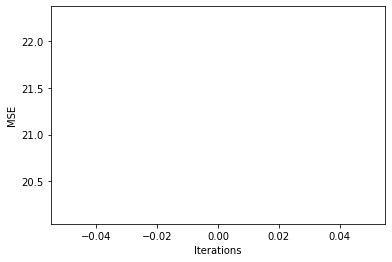

In [52]:
num_iter = 20
hist = sgd(num_iter)  # Note how the MSE decreases with the number of iterations
plt.figure()
plt.plot(np.arange(0, num_iter, 10000), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()


In [53]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions


array([[-3.32 , -4.138, -4.476, ..., -1.626, -3.582, -1.606],
       [ 2.622,  2.909,  2.953, ...,  2.345,  2.509,  2.598],
       [ 4.337,  4.241,  3.958, ...,  5.571,  3.64 ,  6.419],
       ...,
       [ 0.142,  0.124,  0.105, ...,  0.229,  0.106,  0.269],
       [ 0.976,  1.   ,  0.965, ...,  1.119,  0.86 ,  1.275],
       [ 3.367,  3.493,  3.397, ...,  3.733,  3.004,  4.241]])

In [54]:
values = [zip(user_ratings[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = data.columns

In [55]:
comparison_data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,"(-7.82, -3.32025211288737)","(8.79, -4.137917419466664)","(-9.66, -4.476381233664002)","(-8.16, -7.738933826846007)","(-7.52, -2.667521874683862)","(-8.5, -1.6516066940299645)","(-9.85, -4.3478119826593264)","(4.17, -3.642759552123814)","(-8.98, -7.093230132023577)","(-4.76, -2.9306841293700647)","(-8.5, -1.36381430814399)","(-6.75, -1.778321163431927)","(-7.18, -5.560958155184702)","(8.45, -1.7813829736969844)","(-7.18, -5.591322975941941)","(-7.52, -8.510368392654714)","(-7.43, -3.8165861416561366)","(-9.81, -4.6209245656724365)","(-9.85, -3.3562312386191193)","(-9.85, -5.043218096692085)","(-9.37, -0.3589572354150667)","(1.5, -3.870029637834914)","(-4.37, -5.416135976781782)","(-9.81, -8.558229744797982)","(-8.5, -4.270437790102174)","(1.12, -1.9458468865437253)","(7.82, 2.5646972498709966)","(2.86, -1.7480862169051525)","(9.13, 2.5803514747893583)","(-7.43, -6.529316858440121)","(2.14, 0.21320744916178314)","(-4.08, 2.4000688088176365)","(-9.08, -7.958855734235695)","(7.82, -2.8148727797719966)","(5.05, 1.8720640613996682)","(4.95, 2.6811193002743523)","(-9.17, -7.804602642956513)","(-8.4, -2.889306513160502)","(-8.4, -2.7944384583162734)","(-8.4, -3.207817358785937)",...,"(8.59, 0.6387503148063393)","(3.59, 1.6300994425766087)","(-6.84, -4.6108560729418375)","(-9.03, -6.967560852932904)","(2.82, 0.7370252944937502)","(-1.36, 0.9260222082321373)","(-9.08, -7.621408547274407)","(8.3, 1.2712512680691017)","(5.68, 1.0875425603618507)","(-4.81, -4.23228929212272)","(nan, -3.1751740894800884)","(nan, 0.8336638406881761)","(nan, -1.6473863775156732)","(nan, -5.1695787013425925)","(nan, -3.227064524233575)","(nan, 0.8759867347902305)","(nan, -1.8634057106213764)","(-9.42, -1.0946894425743217)","(nan, -2.862611862241605)","(nan, -1.3815147708022897)","(nan, -0.6654042131071833)","(-7.72, -1.9548297660924991)","(nan, -0.02038655055427183)","(nan, -2.581007170489327)","(nan, -2.5149475938490866)","(nan, -3.432791862043545)","(nan, -0.22803460238614773)","(nan, -0.352362078998207)","(nan, 2.3962174252911232)","(nan, -2.46802497744249)","(2.82, -0.403179143377391)","(nan, -1.709674469691695)","(nan, 0.4314618680341304)","(nan, -2.441301491868398)","(nan, -2.3163418095942796)","(nan, -1.1815125168209728)","(-5.63, -1.0341574718286521)","(nan, -1.625615951781196)","(nan, -3.581707394552272)","(nan, -1.605985336742259)"
1,"(4.08, 2.6219048220605345)","(-0.29, 2.9094259139694305)","(6.36, 2.9534766170305273)","(4.37, 3.434919713485217)","(-2.38, 2.120717637819335)","(-9.66, 2.84310500792385)","(-0.73, 2.2006531201769177)","(-5.34, 1.4840017214780283)","(8.88, 3.4469693562016195)","(9.22, 2.634566088714042)","(6.75, 2.6973309488342734)","(8.64, 2.9563511674552645)","(4.42, 1.7561670380551326)","(7.43, 2.952615375288196)","(4.56, 1.5577382864299754)","(-0.97, 1.9756358778434173)","(4.66, 1.6051666116998544)","(-0.68, 2.012942063071592)","(3.3, 2.285403703938581)","(-1.21, 2.4543369985079044)","(0.87, 2.660178716267061)","(8.64, 3.2157873489751787)","(8.35, 3.2750141384176583)","(9.17, 3.3990950473297534)","(0.05, 3.197641869957162)","(7.57, 2.9400440919496305)","(4.71, 1.8301354197806803)","(0.87, 2.778038168881764)","(-0.39, 1.6936281221626885)","(6.99, 3.594369263928515)","(6.5, 2.4228394872601964)","(-0.92, 1.8764740662506516)","(7.14, 3.5146754347108047)","(9.03, 2.9685213748498294)","(-1.8, 2.0602529974099086)","(0.73, 1.7011051039539868)","(7.09, 3.168661642448814)","(3.4, 2.8774849785548584)","(-0.87, 3.0950295453830234)","(7.91, 3.0553941117745245)",...,"(-6.7, 2.4262591956923023)","(-3.35, 2.144326516416755)","(-9.03, 3.146721493432337)","(4.47, 3.257780686916456)","(4.08, 2.278932727463592)","(-3.83, 2.2323940819047636)","(8.74, 3.4847178635973304)","(1.12, 2.0977907912662372)","(0.78, 2.2481490